#Redes P2P - 2022 - Prof. Francisco Sant'anna - Pergunta Google Classroom 1.16
Chinês do algoritmo EigenTrust Simples e Básico não distribuído para o exercício 1.16 do Google Classroom da disciplina Redes P2P

Autor: Luiz Carlos

#####Descrição

O arquivo eigentrust.ipynb permite gerar uma simulação do método EigenTrust simples não distribuído: 

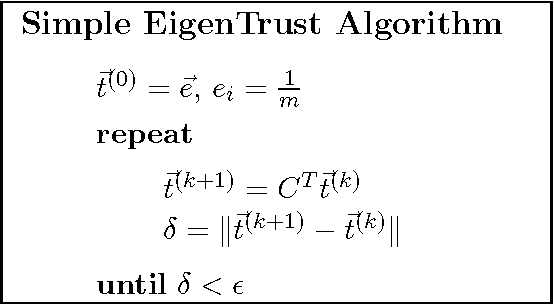

bem como do método Eigentrust básico não distribuído:

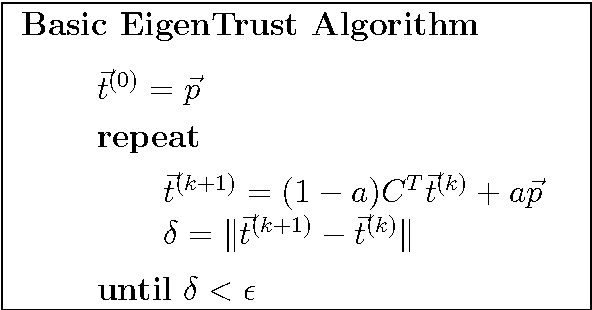

ambos descritos no artigo: "The EigenTrust Algorithm for Reputation Management in P2P Networks" (http://ilpubs.stanford.edu:8090/562/1/2002-56.pdf).

Figura da apresentação (link:https://github.com/lcsl88/Redes-P2P_20222/blob/main/eigentrust-RedesP2P.pdf) que esse modelo em Python simula (método EigenTrust básico não distribuído):

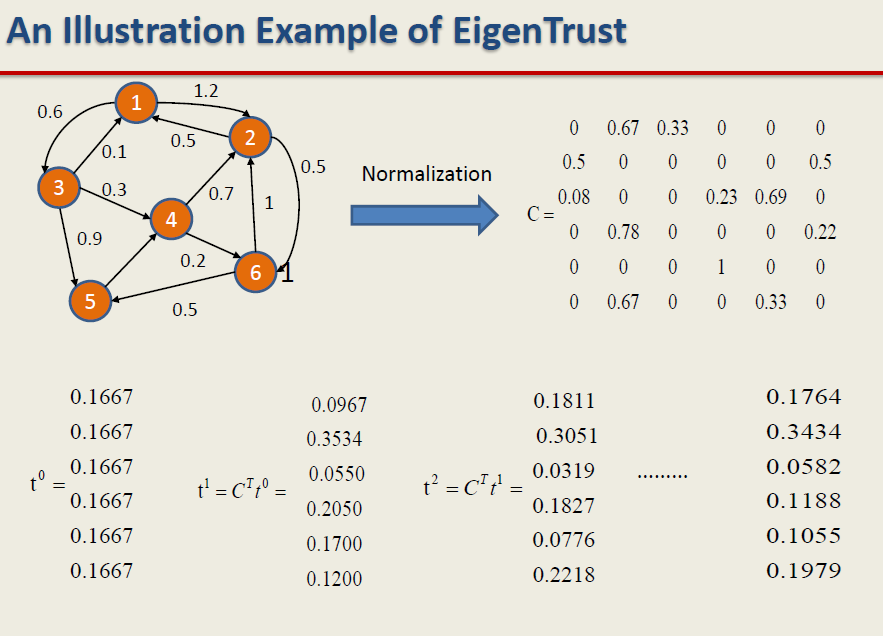

Considerações

Essa versão permite selecionar o número de peers que interagem na simulação.

Saídas

    Matriz S,j
    vetor de confiança e
    Matriz Ci,j ou Matriz Normalizada
    Vetor transposto t
    Matriz Ct representa a matriz Ci,j Transposta

    Por fim, apenas dois tipos de Saídas são apresentados
    O vetor de soma t2 representa a soma dos valores do novo vetor t em cada iteração
    O valor de Delta em cada iteração

##### Idioma e plugins

    google colab
    Plugin NumPy (*)

    (*) Disponível em: https://colab.research.google.com/

##### Instruções

    Python versão 3.7
    Compile usando:

 > python eigentrust.py

In [ ]:
from __future__ import division
import numpy as np
from numpy import matrix
from numpy import linalg as LA

print("Escolha a simulação:")
print("0 - EigenTrust Simples não-distribuído")
print("1 - EigenTrust Básico não-distribuído")

TipoDeSimulacao=int(input(""))
if(TipoDeSimulacao==0):
    #Número Total de peers a simular
    Dimension=int(input("Ingresse com a dimensão da matriz: "))
    B=np.matrix('0 1.2 0.6 0 0 0 ; 0.5 0 0 0 0 0.5 ; 0.1 0 0 0.3 0.9 0 ; 0 0.7 0 0 0 0.2 ; 0 0 0 1 0 0 ; 0 1 0 0 0.5 0')
    #B =np.random.randint(5, size=(Dimension, Dimension))
    print(B)

    #A = matrix( [[0,3,1,0],[1,0,4,7],[2,-1,0,-1],[-5,4,3,0]])
    #B= np.matrix('0 3 1 0; 1 0 4 7; 2 -1 0 -1 ;-5 4 3 0')
    MatrixNormal=np.identity(Dimension)
    #print("Matriz Sij = ")
    #print(MatrixNormal)

    # Normalizando Valores Local Trust

    for i in range(len(B)):
        for j in range(len(B)):
            value=max((B[i,j]),0)
            B[i,j]=value
    	 #print(B)

    for i in range(len(B)):
        for j in range(len(B)):
            C=B.sum(axis=1) # soma de linhas
    	#print(C)
            SomaDeLinhas=float(C[i])
    	#print("As linhas somam ",SomaDeLinhas)
            if C[i]==0:
                print("Simples não funciona")
            else:
                #print 'aqui vou dividir ',B[i,j],'/',SomaDeLinhas
                value=float(B[i,j])
                valueForNormalMatrix=value/SomaDeLinhas
                #print valueForNormalMatrix
            MatrixNormal[i,j]= round(float(valueForNormalMatrix),2)

    #Gerando o Vetor de Confiança e
    e= np.empty(Dimension)
    matrix(e.fill(1/Dimension))

    print("Vetor de Confiança e =",e)
    print("Matrix Normal ")
    print(MatrixNormal)

    #Começa a iteração
    Delta=1
    t=e.T
    print("Vetor Transposto t ",t)
    Ct=MatrixNormal.transpose()
    print("Matriz Ct ")
    print(Ct)
    while (Delta>0.0000001):
     	t2=np.dot(Ct,t)
     	#print("Vetor t multiplicado =" , t2)      
     	print("Soma vetor tn =",t2.sum(axis=0))      
      #print("Vetor tn =", t2)
     	VetoresDeSubtracao=t2-t
     	Delta=LA.norm(VetoresDeSubtracao)
     	print("Delta= ",Delta)
     	t=t2
    
    print("Último Delta",Delta)    
    print("Soma Vetor tn final", t2.sum(axis=0))
    print("Vetor tn final", t2)

if (TipoDeSimulacao==1):

    #Numero Total de peers a simular
    
    Dimension=int(input("Ingressar com o número de peers: "))
    a=float(input("Nível de confiança para Peers Confiáveis: "))
    
    #Gerando Matriz Sij
    #testes de B:
    #B=np.matrix('0. 3 1 0; 1 0 4 7; 2 -1 0 -1 ;-5 4 3 0')
    #B=np.matrix('0 -1 -2  3 -2 ; -5  0 -2  2  1 ; -5 -2  0 -4  0 ;  2  0  4  0 -1 ; 0 -2 -5  2  0')
    #B=np.matrix('0 1.2 0.6 0 0 0 ; 0.5 0 0 0 0 0.5 ; 0.1 0 0 0.3 0.9 0 ; 0 0.7 0 0 0 0.2 ; 0 0 0 1 0 0 ; 0 1 0 0 0.5 0')
    B=np.random.randint(-Dimension,Dimension, size=(Dimension, Dimension))
    
    #Fazendo a diagonal da matriz 0
    for i in range(len(B)):
        for j in range(len(B)):
            if (i==j):
                B[i,j]=0
         #print(B)
    #A = matrix( [[0,3,1,0],[1,0,4,7],[2,-1,0,-1],[-5,4,3,0]])
    
    MatrizNormal=np.identity(Dimension)
    #print("Matriz Sij = ")
    #print(MatrizNormal)
    print("Matriz de Si,j")
    print(B)
    
    #Gerando o Vetor p<----------
    p= np.empty(Dimension)
    matrix(p.fill(1/Dimension))

    print("Vetor de Confiança p =",p)

    #Encontrar linhas que somam 0 e alterá-las pelo vetor de pré-confiança
    for i in range(len(B)):
        for j in range(len(B)):
            C=B.sum(axis=1) # soma da linha
            if C[i]==0:
            	#print(" a soma da linha é 0 mudado pelo vetor de pré-confiança")
                B[i]=p
                print(B)

    # Normalizando Valores Local Trust
    
    for i in range(len(B)):
        for j in range(len(B)):
            C=B.sum(axis=1) # soma da linha
       		#print(C)
            SomaDaLinha=float(C[i])
       		#print("a linha soma "),SomaDaLinha
            valor=int(B[i,j])
            valorParaMatrizNormal=valor/SomaDaLinha
            MatrizNormal[i,j]= float(valorParaMatrizNormal)

    print("Matriz Normal")
    print(MatrizNormal)

    #Começa a Iteração
    Delta=1
    t=p.T
    #t=p.transpose()
    print("Vetor Transposto t",t)
    Ct=MatrizNormal.transpose()
    print("Matriz Ct")
    print(Ct)
    while (Delta>0.0000001):
        t2=np.dot(Ct,t)
        t2=np.dot((1-a),t2)+np.dot(a,p)
        SubtracaoDeVetores=t2-t
        print("subtração vetorial =",SubtracaoDeVetores)
        Delta=LA.norm(SubtracaoDeVetores)
        #print("Delta=",Delta)
        t=t2

    print("Último Delta",Delta)
    print("Vetor t2 final soma: ", t2.sum(axis=0))
    print("Vetor de Confiança Final :",t2)    

Escolha a simulação:
0 - EigenTrust Simples não-distribuído
1 - EigenTrust Básico não-distribuído
0
Ingresse com a dimensão da matriz: 6
[[0.  1.2 0.6 0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.5]
 [0.1 0.  0.  0.3 0.9 0. ]
 [0.  0.7 0.  0.  0.  0.2]
 [0.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.5 0. ]]
Vetor de Confiança e = [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Matrix Normal 
[[0.   0.67 0.33 0.   0.   0.  ]
 [0.5  0.   0.   0.   0.   0.5 ]
 [0.08 0.   0.   0.23 0.69 0.  ]
 [0.   0.78 0.   0.   0.   0.22]
 [0.   0.   0.   1.   0.   0.  ]
 [0.   0.67 0.   0.   0.33 0.  ]]
Vetor Transposto t  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Matriz Ct 
[[0.   0.5  0.08 0.   0.   0.  ]
 [0.67 0.   0.   0.78 0.   0.67]
 [0.33 0.   0.   0.   0.   0.  ]
 [0.   0.   0.23 0.   1.   0.  ]
 [0.   0.   0.69 0.   0.   0.33]
 [0.   0.5  0.   0.22 0.   0.  ]]
Soma vetor tn = 0.9999999999999999
Delta=  0.23637305731030817
Soma vetor tn = 1.0
Delta=  0.1714